In [0]:
#MNISTデータセットをインポート
from keras.datasets import mnist

#MNSITデータセットの読込
(x_train, t_train), (x_test, t_test) = mnist.load_data()

In [0]:
#データの前処理
from keras.utils import np_utils

#正解ラベルのクラス数
classes = 10

#画素値データを変形
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#画素値データのデータ型を変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#画素値データを0.0から1.0の範囲に正規化
x_train /= 255
x_test /= 255

#正解ラベルをone-hot表現に変換
t_train = np_utils.to_categorical(t_train, classes)
t_test = np_utils.to_categorical(t_test, classes)

In [22]:
#ニューラルネットワークを構築する
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

#Sequentialのインスタンス化
model = Sequential()

model.add(Dense(200, input_dim=784, activation="relu")) #入力層～隠れ層
model.add(Dense(10, activation="softmax"))              #出力層

#損失関数はエントロピー誤差を指定、最適化手法はAdamを指定、性能評価は正解率を指定
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

#構築したニューラルネットワークの概要を表示
model.summary()

#学習を行って結果を出力
history = model.fit(x_train, t_train, epochs=5, batch_size=100, verbose=1, validation_data=(x_test, t_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.3030 - acc: 0.9161 - val_loss: 0.1652 - val_acc: 0.9519
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.1348 - acc: 0.9614 - val_loss: 0.1191 - val_acc: 0.9639
Epoch 3/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0937 - acc: 0.9729 - val_loss: 0.0955 - val_acc: 0.9719
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - lo

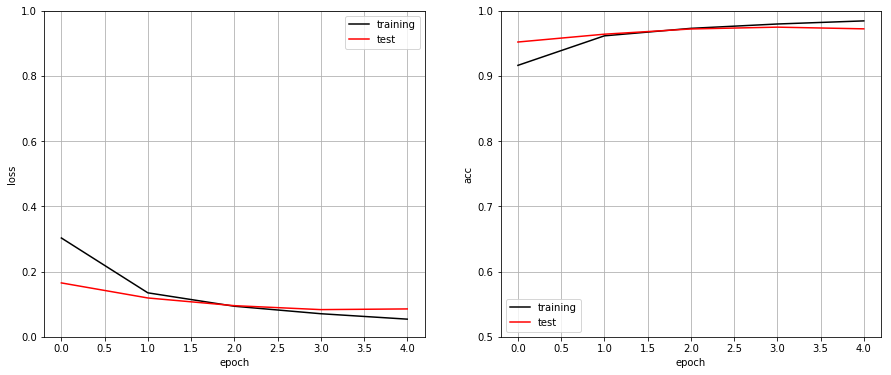

In [26]:
#グラフで結果を出力
%matplotlib inline
import matplotlib.pyplot as plt

#プロット図のサイズを指定
plt.figure(figsize=(15, 6))

#プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.2)

#1×2のグリッドの左(1,2,1)の領域にプロット
plt.subplot(1,2,1)

#誤差の推移をプロット
plt.plot(history.history["loss"], label="training", color="black")
plt.plot(history.history["val_loss"], label="test", color="red")

plt.ylim(0,1) #y軸の範囲
plt.legend()  #凡例を表示
plt.grid()    #グリッドを表示

plt.xlabel("epoch") #x軸のラベル
plt.ylabel("loss")  #y軸のラベル


#1×2のグリッドの左(1,2,2)の領域にプロット
plt.subplot(1,2,2)

#正解率の推移をプロット
plt.plot(history.history["acc"], label="training", color="black")
plt.plot(history.history["val_acc"], label="test", color="red")

plt.ylim(0.5,1) #y軸の範囲
plt.legend()  #凡例を表示
plt.grid()    #グリッドを表示

plt.xlabel("epoch") #x軸のラベル
plt.ylabel("acc")  #y軸のラベル

plt.show()